## YData Profiling: USA Air Pollution Data
Source of data: https://data.world/data-society/us-air-pollution-data

The autoreload instruction reloads modules automatically before code execution, which is helpful for the update below.

In [2]:
%load_ext autoreload
%autoreload 2

Make sure that we have the latest version of ydata-profiling.

In [3]:
%%capture
import sys

!{sys.executable} -m pip install -U ydata-profiling[notebook]
!pip install jupyter-contrib-nbextensions
!jupyter nbextension enable --py widgetsnbextension

You might want to restart the kernel now.

### Import libraries

In [4]:
import pandas as pd

from ydata_profiling import ProfileReport, compare
from ydata_profiling.utils.cache import cache_file

### Load and prepare the dataset

In [5]:
file_name = cache_file(
    "pollution_us_2000_2016.csv",
    "https://query.data.world/s/mz5ot3l4zrgvldncfgxu34nda45kvb",
)

df = pd.read_csv(file_name, index_col=[0])
df


,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,1.083333,...,Parts per billion,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0
24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN
24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN


In [ ]:

# We will only consider the data from Arizone state for this example
df = df[df["State"] == "Arizona"]
df["Date Local"] = pd.to_datetime(df["Date Local"])

### Multi-entity time-series

The support to time series can be enabled by passing the parameter tsmode=True to the ProfileReport when its enabled, ydata-profiling will try to identify time-dependent features using the feature's autocorrelation, which requires a sorted DataFrame or the definition of the `sortby` parameter.

When a feature is identified as time series will trigger the following changes:
   - the histogram will be replaced by a line plot
   - the feature details will have a new tab with autocorrelation and partial autocorrelation plots
   - two new warnings: `NON STATIONARY` and `SEASONAL` (which indicates that the series may have seasonality)

In cases where the data has multiple entities,  as in this example, where we have different meteorological stations, each station can be interpreted as a time series, its necessary to filter the entities and profile each station separately.

The following plot showcases the amount of data for each entity over time. In this case the data from the stations started being collected at the same period, and the data is collected hourly so they have the same amount of data per period.

/home/albana/.pyenv/versions/3.12.1/lib/python3.12/site-packages/ydata_profiling/visualisation/plot.py:892: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby([entity_column, "__bins"])[sortbykey].count()
/home/albana/.pyenv/versions/3.12.1/lib/python3.12/site-packages/ydata_profiling/visualisation/plot.py:895: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(values=sortbykey, index="__bins", columns=entity_column)


<Axes: xlabel='Time'>

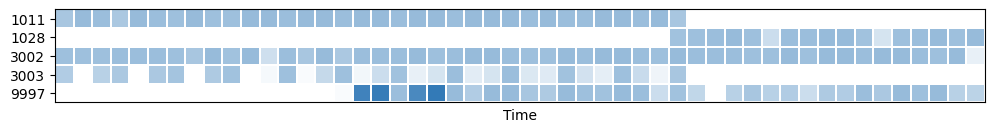

In [3]:
from ydata_profiling.visualisation.plot import timeseries_heatmap

timeseries_heatmap(dataframe=df, entity_column="Site Num", sortby="Date Local")

In [4]:
# Return the profile per station
for group in df.groupby("Site Num"):
    # Running 1 profile per station
    profile = ProfileReport(
        group[1],
        tsmode=True,
        sortby="Date Local",
        # title=f"Air Quality profiling - Site Num: {group[0]}"
    )

    profile.to_file(f"Ts_Profile_{group[0]}.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 28/28 [00:08<00:00,  3.20it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 28/28 [00:02<00:00, 13.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 28/28 [00:12<00:00,  2.24it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 28/28 [00:02<00:00, 10.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 28/28 [00:07<00:00,  3.79it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
comparison_report = compare([train_report, validation_report, test_report])

# Obtain merged statistics
statistics = comparison_report.get_description()

# Save report to file
comparison_report.to_file("comparison.html")